<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/DrugPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight-Passengers-Satisfaction**

# **1. Introduction**


**Your client for this project is an Airline Company.**


*   Due to **fierce** competition in the airline industry, the airline company needs to focus on the passenger’s experience and satisfaction.
*   **Customer feedback**, in particular, is critical since it is an outcome **measurement** for business performance.



*   So, they need to analyze the data of the passenger's travel history.
One of the key measurements in this process is whether the passenger feels satisfied or not.
*   Current Scenario: 
Currently, they have a manual process to analyze the customer satisfaction based on the number of feedback and complaint mail that they receive.



# **2. Problem Statement**
**The current process suffers from the following problems:**

*   Analyzing the data of passengers manually and to understand whether a passenger is satisfied or not is a tedious task.
*   This process needs to be repeated every time they receive some feedback.

The company has hired you as data science consultants.

They want to **automate** the process of **predicting** the passenger satisfaction based on the travel history data collected by the airline company.

**Your Role**
*   You are given a dataset containing the answer of different questions asked as the feedback.
*   Your task is to build a classification model using the dataset.
*   Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


# **3. Import Libraries**

In [63]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings(action="ignore")

# **4. Data Acquisition & Description**

In [64]:
data=pd.read_csv("/content/drive/MyDrive/TermProjects/DrugPrediction/drug_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/TermProjects/DrugPrediction/drug_test.csv")
data.head()


,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [66]:
data.describe()

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194988
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**

**Check null value or any other inconsistent value in column**

In [67]:
print((data=="").sum(), "\n")

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64 



In [68]:
print(data.isna().sum(), "\n")


Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64 



In [69]:
print((data=="Unknown").sum(), "\n")


Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64 



In [70]:
print((data==0).sum(), "\n")

Id             1
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64 



In [71]:
data.duplicated().any()

False

In [72]:
catCol=["Sex","BP","Cholesterol","Drug"]
for col in catCol:
  print(data[col].value_counts())



M    83
F    77
Name: Sex, dtype: int64
HIGH      62
NORMAL    51
LOW       47
Name: BP, dtype: int64
HIGH      88
NORMAL    72
Name: Cholesterol, dtype: int64
DrugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: Drug, dtype: int64


**Check distribution of numerical features and Outliers**

outliers in feature Age are
 Series([], Name: Age, dtype: int64)
outliers in feature Na_to_K are
 3      33.486
17     35.639
19     38.247
55     34.686
86     37.188
153    34.997
Name: Na_to_K, dtype: float64


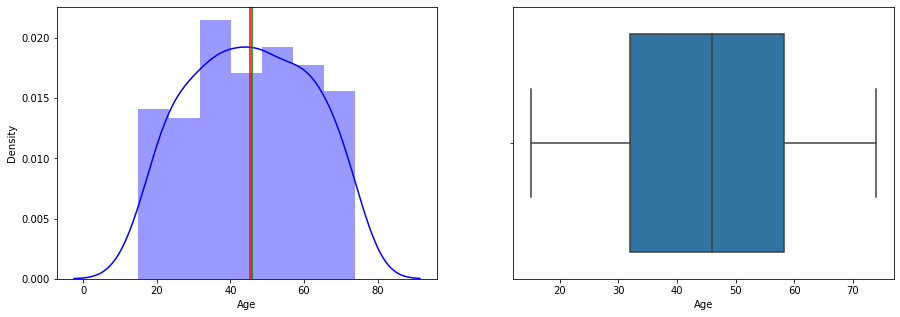

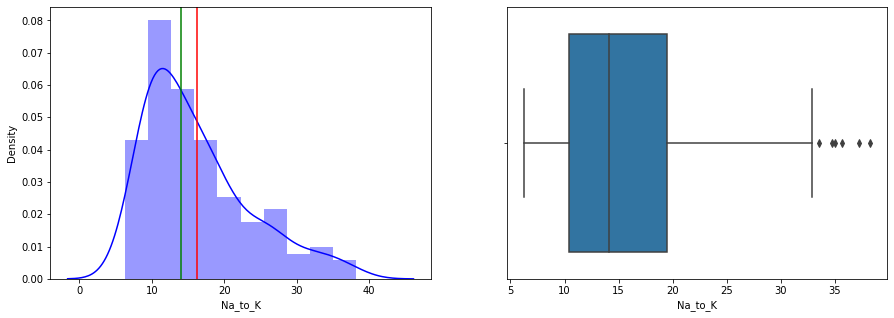

In [73]:
contColumn=["Age","Na_to_K"]

for col in contColumn:  
  fig=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  sns.boxplot(data[col])
  quamtile_75=data[col].quantile(q=.75)
  quamtile_25=data[col].quantile(q=.25)
  iqr=quamtile_75-quamtile_25
  lower_limit=quamtile_25-1.5*iqr
  upper_limit=quamtile_75+1.5*iqr
  outliers=data[col][(data[col]<lower_limit )|(data[col]>upper_limit)]
  print("outliers in feature", col ,"are\n" ,outliers)
  # data.drop(index=outliers.index, inplace=True)

  

### **5.2 Data Cleaning**

- N/A

### **5.3 Data Post-Profiling**

- N/A

# **6. Exploratory Data Analysis**

### **Check the frequency of catrgorical features**

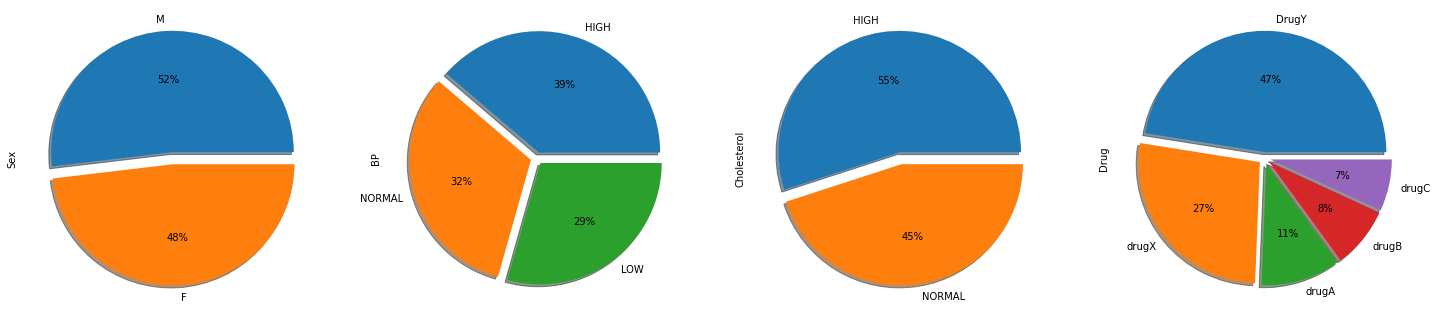

In [74]:
CatColumn=["Sex","BP","Cholesterol","Drug"]
fig=plt.figure(figsize=[25,10])

for col in CatColumn:  
  plt.subplot(1,len(CatColumn),(CatColumn.index(col))+1)
  space = np.ones(data[col].nunique())/20
  data[col].value_counts().plot(kind='pie', explode=space, autopct='%1.0f%%',shadow = True)


### **Analize Relationship between BP, Cholestrol and Drug**

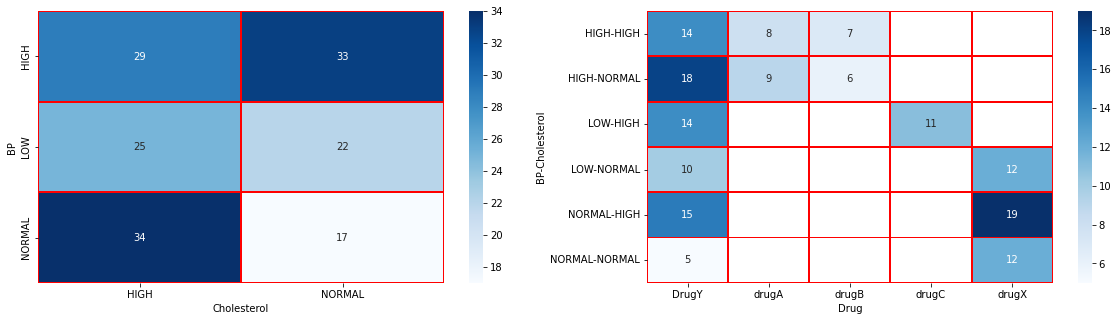

In [75]:
fig=plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
data1=data.groupby(["BP","Cholesterol"])["Id"].count().unstack()
sns.heatmap(data1,annot=True,cmap="Blues",linecolor='Red',linewidth=1)
plt.subplot(1,2,2)
data1=data.groupby(["BP","Cholesterol","Drug"])["Drug"].count().unstack()
sns.heatmap(data1,annot=True,cmap="Blues",linecolor='Red',linewidth=1)

### **Analize Relationship between Age, Na_to_K and Drug**

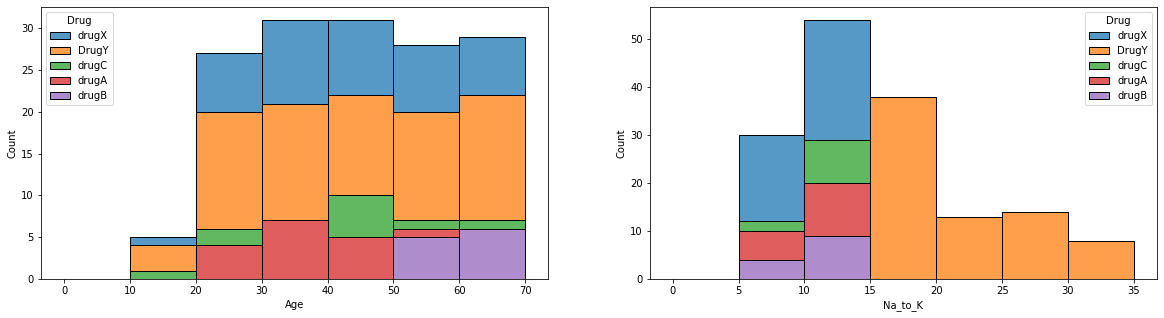

In [76]:
fig=plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.histplot(data=data,x="Age",bins=np.arange(0,80,10),hue="Drug",multiple="stack",stat="count")
plt.subplot(1,2,2)
sns.histplot(data=data,x="Na_to_K",bins=np.arange(0,40,5),hue="Drug",multiple="stack",stat="count")


### **Correlation Matrix**

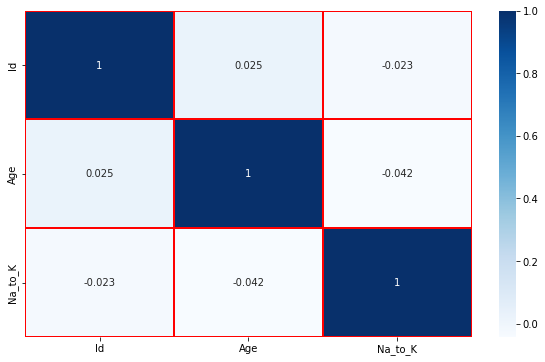

In [77]:
figure=plt.figure(figsize=[10,6])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor='Red',linewidth=1)

## **Check Data Imbalance**

In [78]:
data.Drug.value_counts()

DrugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: Drug, dtype: int64

# **7. Data Post-Processing**

### **7.1 Data Preparation / Train Test Split**



In [79]:
#**Remove Irrelavent Features**

data=data.drop(["Id"], axis=1)
dataValidationId=dataValidation.Id
dataValidation=dataValidation.drop(["Id"], axis=1)
X=data.drop("Drug",axis=1)
y=data.Drug

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=20,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
data.head(5)


(112, 5)
(112,)
(48, 5)
(48,)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,32,F,LOW,NORMAL,10.840,drugX
1,52,M,NORMAL,HIGH,9.894,drugX
2,39,F,NORMAL,NORMAL,9.709,drugX
3,33,F,LOW,HIGH,33.486,DrugY
4,34,M,NORMAL,HIGH,22.456,DrugY


### **7.2 Data Encoding**

- In this section, we will encode our categorical features using one hot encoding.

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
# Define which columns should be encoded
columns_to_encode=["Sex","BP","Cholesterol"]
# Instantiate OHE

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_encoded = pd.DataFrame(OH_encoder.fit_transform(X_train[columns_to_encode]),index=X_train.index)
test_encoded = pd.DataFrame(OH_encoder.transform(X_test[columns_to_encode]),index=X_test.index)
validation_encoded = pd.DataFrame(OH_encoder.transform(dataValidation[columns_to_encode]),index=dataValidation.index)

# Adding column names to the encoded data set.
train_encoded.columns = OH_encoder.get_feature_names(columns_to_encode)
test_encoded.columns = OH_encoder.get_feature_names(columns_to_encode)
validation_encoded.columns = OH_encoder.get_feature_names(columns_to_encode)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(columns_to_encode, axis=1)
num_X_test = X_test.drop(columns_to_encode, axis=1)
num_X_valid = dataValidation.drop(columns_to_encode, axis=1)

# Add one-hot encoded columns to numerical features
X_train = pd.concat([num_X_train, train_encoded], axis=1)
X_test = pd.concat([num_X_test, test_encoded], axis=1)
X_validation = pd.concat([num_X_valid, validation_encoded], axis=1)

### **7.2 Data Scaling**

- Tree models dont require Scaling.

# **8. Model Development & Evaluation**

### **Prediction Using Decision Tree**

In [81]:
modelDT=DecisionTreeClassifier(random_state=25)
modelDT.fit(X_train,y_train)

y_train_pred=modelDT.predict(X_train)
y_test_pred=modelDT.predict(X_test)


print("Accuracy Score for Training Data is ", accuracy_score(y_train,y_train_pred))
print("Accuracy Score for Testing Data is ", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for train data is\n",confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix for Test data is \n ", confusion_matrix(y_test, y_test_pred))

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)


Accuracy Score for Training Data is  1.0
Accuracy Score for Testing Data is  0.9791666666666666
Confusion Matrix for train data is
 [[53  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0 30]]
Confusion Matrix for Test data is 
  [[23  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 13]]
                    Training Report          
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        53
       drugA       1.00      1.00      1.00        12
       drugB       1.00      1.00      1.00         9
       drugC       1.00      1.00      1.00         8
       drugX       1.00      1.00      1.00        30

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

                    Testing Report           
              precision    recall  f1-score   support

       DrugY 

### **Feature Importance**

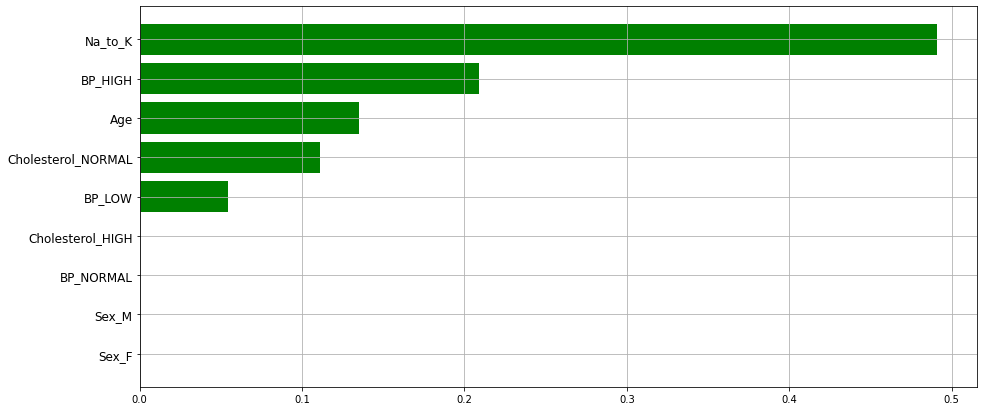

In [82]:
features = X_train.columns
importances = modelDT.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[15, 7])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.grid(b=True)
plt.show()

### **Hyperparameter Tuning of Decision Tree using RandomSearchCV**

In [83]:
param_list={
      "criterion" : ["gini","entropy"],
      "splitter":["best","random"],
      "max_depth" : [None,2,3,4,5,6],
      "min_samples_leaf":[1,2,3,4,5],
      "min_samples_split" :[2,3,4,5],
      "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6],
      "max_features":["auto","log2","sqrt",None],
      "max_leaf_nodes":[None,10,20,30,40,50]
      }

modelDTRandCV=RandomizedSearchCV(estimator=modelDT,param_distributions=param_list,cv=3,n_jobs=-1,n_iter=1000,random_state=45)
modelDTRandCV.fit(X_train,y_train)
y_train_pred=modelDTRandCV.predict(X_train)
y_test_pred=modelDTRandCV.predict(X_test)
print("Accuracy Score for Training Data is ", accuracy_score(y_train,y_train_pred))
print("Accuracy Score for Testing Data is ", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for train data is\n",confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix for Test data is \n ", confusion_matrix(y_test, y_test_pred))

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

Accuracy Score for Training Data is  1.0
Accuracy Score for Testing Data is  0.9791666666666666
Confusion Matrix for train data is
 [[53  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0 30]]
Confusion Matrix for Test data is 
  [[23  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 13]]
                    Training Report          
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        53
       drugA       1.00      1.00      1.00        12
       drugB       1.00      1.00      1.00         9
       drugC       1.00      1.00      1.00         8
       drugX       1.00      1.00      1.00        30

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

                    Testing Report           
              precision    recall  f1-score   support

       DrugY 

### **Build Model-Random Forest**

In [84]:
modelRF=RandomForestClassifier(random_state=0)
modelRF.fit(X_train,y_train)
y_train_pred=modelRF.predict(X_train)
y_test_pred=modelRF.predict(X_test)
print("Accuracy Score for Training Data is ", accuracy_score(y_train,y_train_pred))
print("Accuracy Score for Testing Data is ", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for train datais\n", confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix for Test data is \n ", confusion_matrix(y_test, y_test_pred))

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)



Accuracy Score for Training Data is  1.0
Accuracy Score for Testing Data is  0.9791666666666666
Confusion Matrix for train datais
 [[53  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0 30]]
Confusion Matrix for Test data is 
  [[23  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 13]]
                    Training Report          
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        53
       drugA       1.00      1.00      1.00        12
       drugB       1.00      1.00      1.00         9
       drugC       1.00      1.00      1.00         8
       drugX       1.00      1.00      1.00        30

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

                    Testing Report           
              precision    recall  f1-score   support

       DrugY  

# **9. Summarization and Predict Output for Test File**

In [85]:
X_validation_pred=modelRF.predict(X_validation)
submission = pd.DataFrame({'id':dataValidationId,'satisfaction':X_validation_pred})
submission.satisfaction=submission.satisfaction.replace([0,1],["neutral or dissatisfied","satisfied"])
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>